In [27]:
import scanpy as sc
import pandas as pd
sc.settings.set_figure_params(dpi=80, facecolor='white')

## Load Data

Data available at: https://gtexportal.org/home/datasets

In [2]:
if False:
    gtex_tpm = pd.read_csv("data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz", sep='\t', skiprows=2)

    var = gtex_tpm[['Name', 'Description']]
    var.index = var.Name.tolist()

    data = gtex_tpm.drop(['Name', 'Description'], axis=1).T

    obs = pd.read_table("data/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt")
    obs.index = obs.SAMPID
    obs = obs.loc[data.index]

    adata = sc.AnnData(X=data, obs=obs, var=var)
    adata.write_h5ad("data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.h5ad")
else:
    adata = sc.read_h5ad("data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.h5ad")
                         
adata

AnnData object with n_obs × n_vars = 17382 × 56200
    obs: 'SAMPID', 'SMATSSCR', 'SMCENTER', 'SMPTHNTS', 'SMRIN', 'SMTS', 'SMTSD', 'SMUBRID', 'SMTSISCH', 'SMTSPAX', 'SMNABTCH', 'SMNABTCHT', 'SMNABTCHD', 'SMGEBTCH', 'SMGEBTCHD', 'SMGEBTCHT', 'SMAFRZE', 'SMGTC', 'SME2MPRT', 'SMCHMPRS', 'SMNTRART', 'SMNUMGPS', 'SMMAPRT', 'SMEXNCRT', 'SM550NRM', 'SMGNSDTC', 'SMUNMPRT', 'SM350NRM', 'SMRDLGTH', 'SMMNCPB', 'SME1MMRT', 'SMSFLGTH', 'SMESTLBS', 'SMMPPD', 'SMNTERRT', 'SMRRNANM', 'SMRDTTL', 'SMVQCFL', 'SMMNCV', 'SMTRSCPT', 'SMMPPDPR', 'SMCGLGTH', 'SMGAPPCT', 'SMUNPDRD', 'SMNTRNRT', 'SMMPUNRT', 'SMEXPEFF', 'SMMPPDUN', 'SME2MMRT', 'SME2ANTI', 'SMALTALG', 'SME2SNSE', 'SMMFLGTH', 'SME1ANTI', 'SMSPLTRD', 'SMBSMMRT', 'SME1SNSE', 'SME1PCTS', 'SMRRNART', 'SME1MPRT', 'SMNUM5CD', 'SMDPMPRT', 'SME2PCTS'
    var: 'Name', 'Description'

## Preprocessing

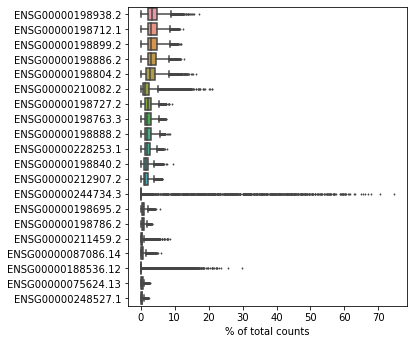

In [3]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [4]:
sc.pp.calculate_qc_metrics(adata, log1p=False, inplace=True)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


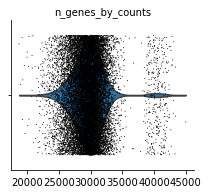

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


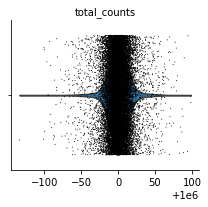

In [7]:
sc.pl.violin(adata, ['n_genes_by_counts'],
             jitter=0.4, multi_panel=True)
sc.pl.violin(adata, ['total_counts'],
             jitter=0.4, multi_panel=True)

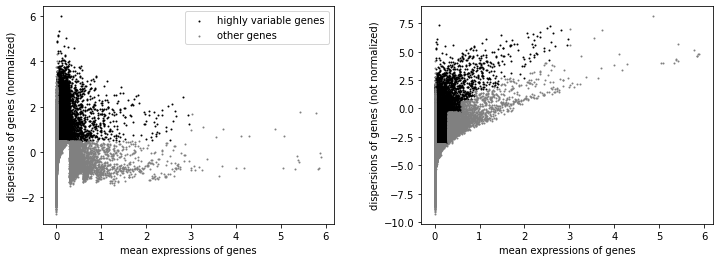

In [8]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [9]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
# sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata, max_value=10)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\scanpy\preprocessing\_simple.py:806: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


## Dimension Reduction and Visualization

In [16]:
adata.obs.iloc[0].to_frame().style

,GTEX-1117F-0226-SM-5GZZ7
SAMPID,GTEX-1117F-0226-SM-5GZZ7
SMATSSCR,0.000000
SMCENTER,B1
SMPTHNTS,"2 pieces, ~15% vessel stroma, rep delineated"
SMRIN,6.800000
SMTS,Adipose Tissue
SMTSD,Adipose - Subcutaneous
SMUBRID,0002190
SMTSISCH,1214.000000
SMTSPAX,1125.000000


In [40]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=100)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


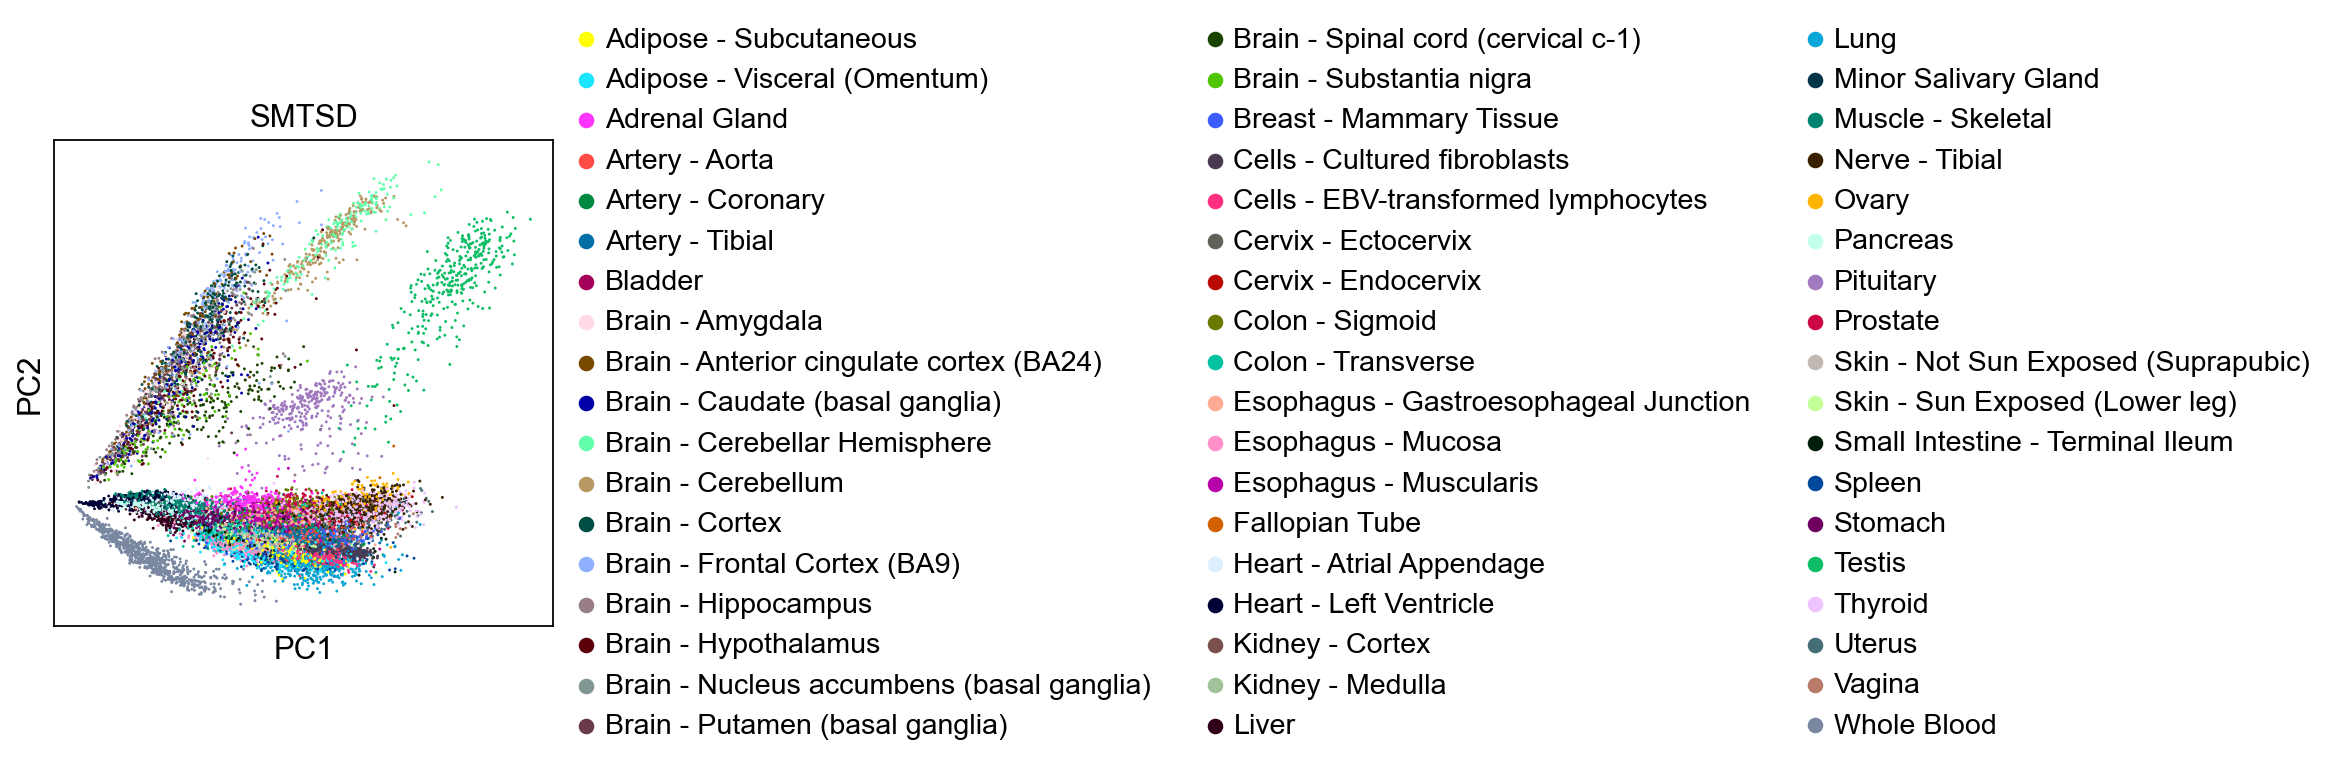

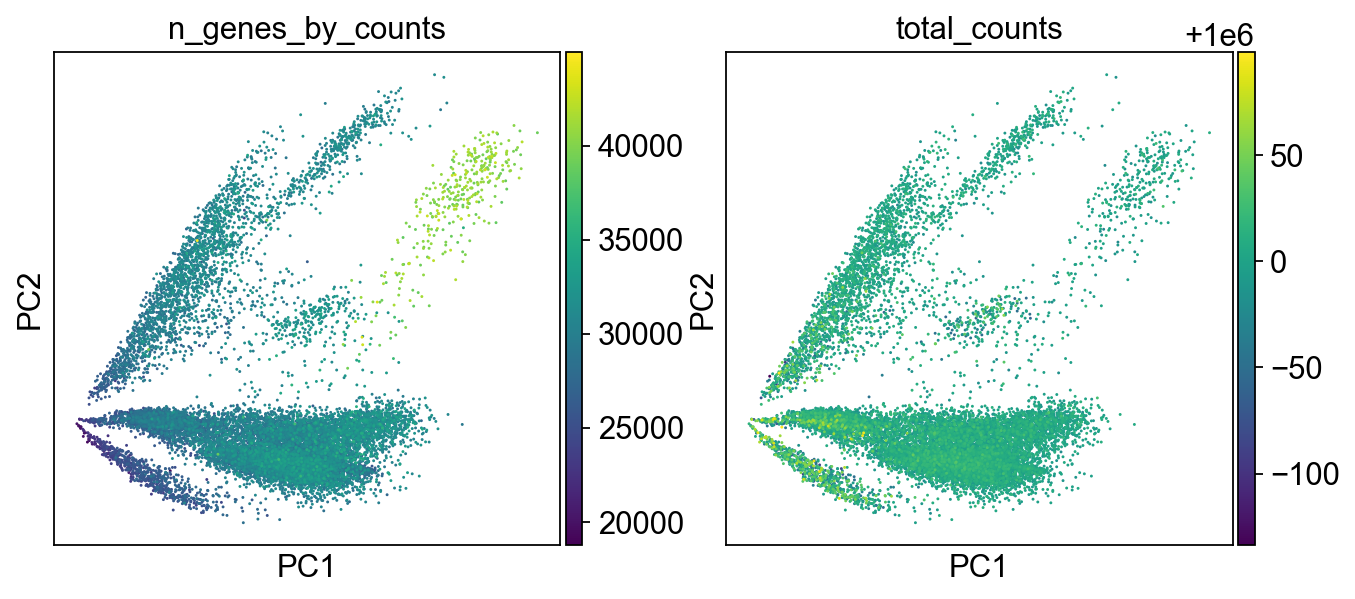

In [28]:
sc.pl.pca(adata, color='SMTSD')
sc.pl.pca(adata, color=['n_genes_by_counts', "total_counts"])

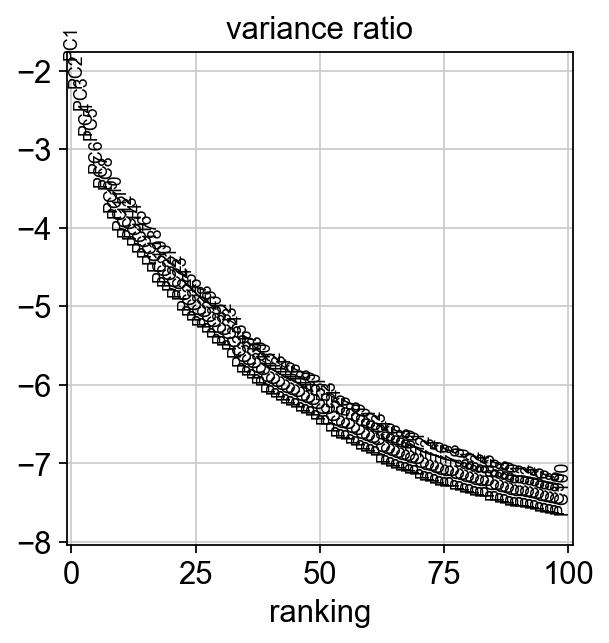

In [41]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=100)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


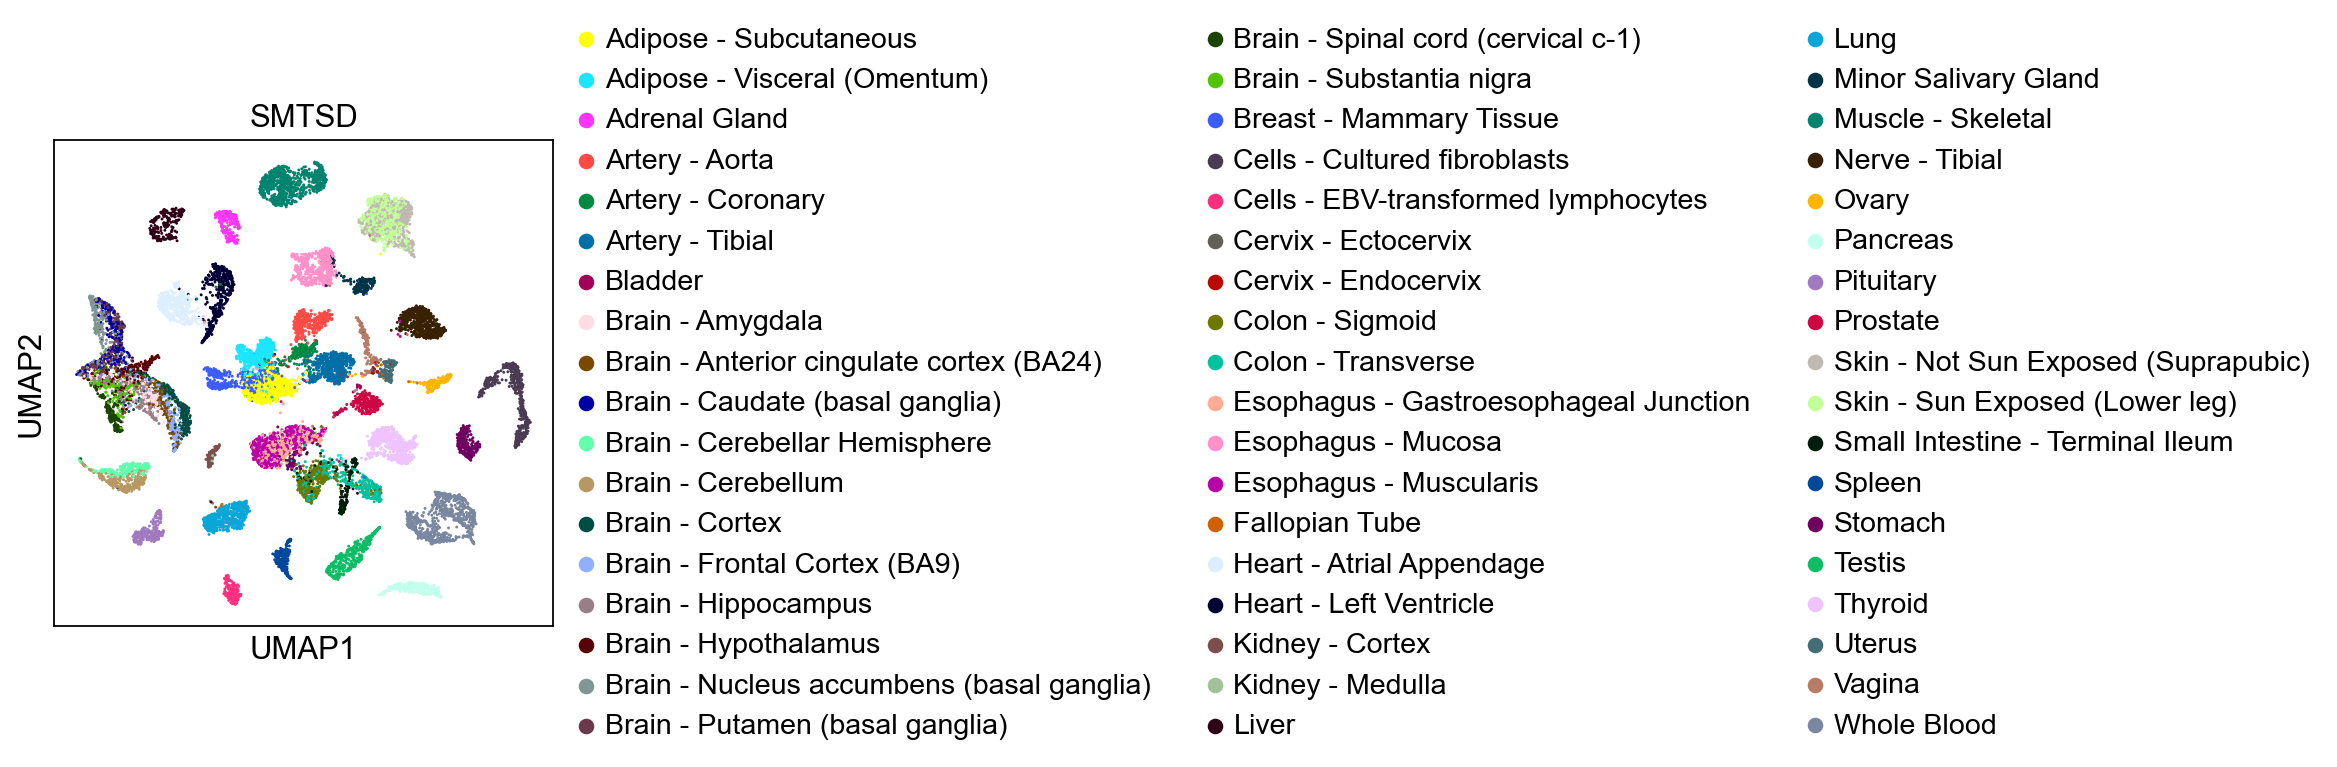

In [42]:
sc.pp.neighbors(adata, n_pcs=100)
sc.tl.umap(adata)
sc.pl.umap(adata, color='SMTSD')

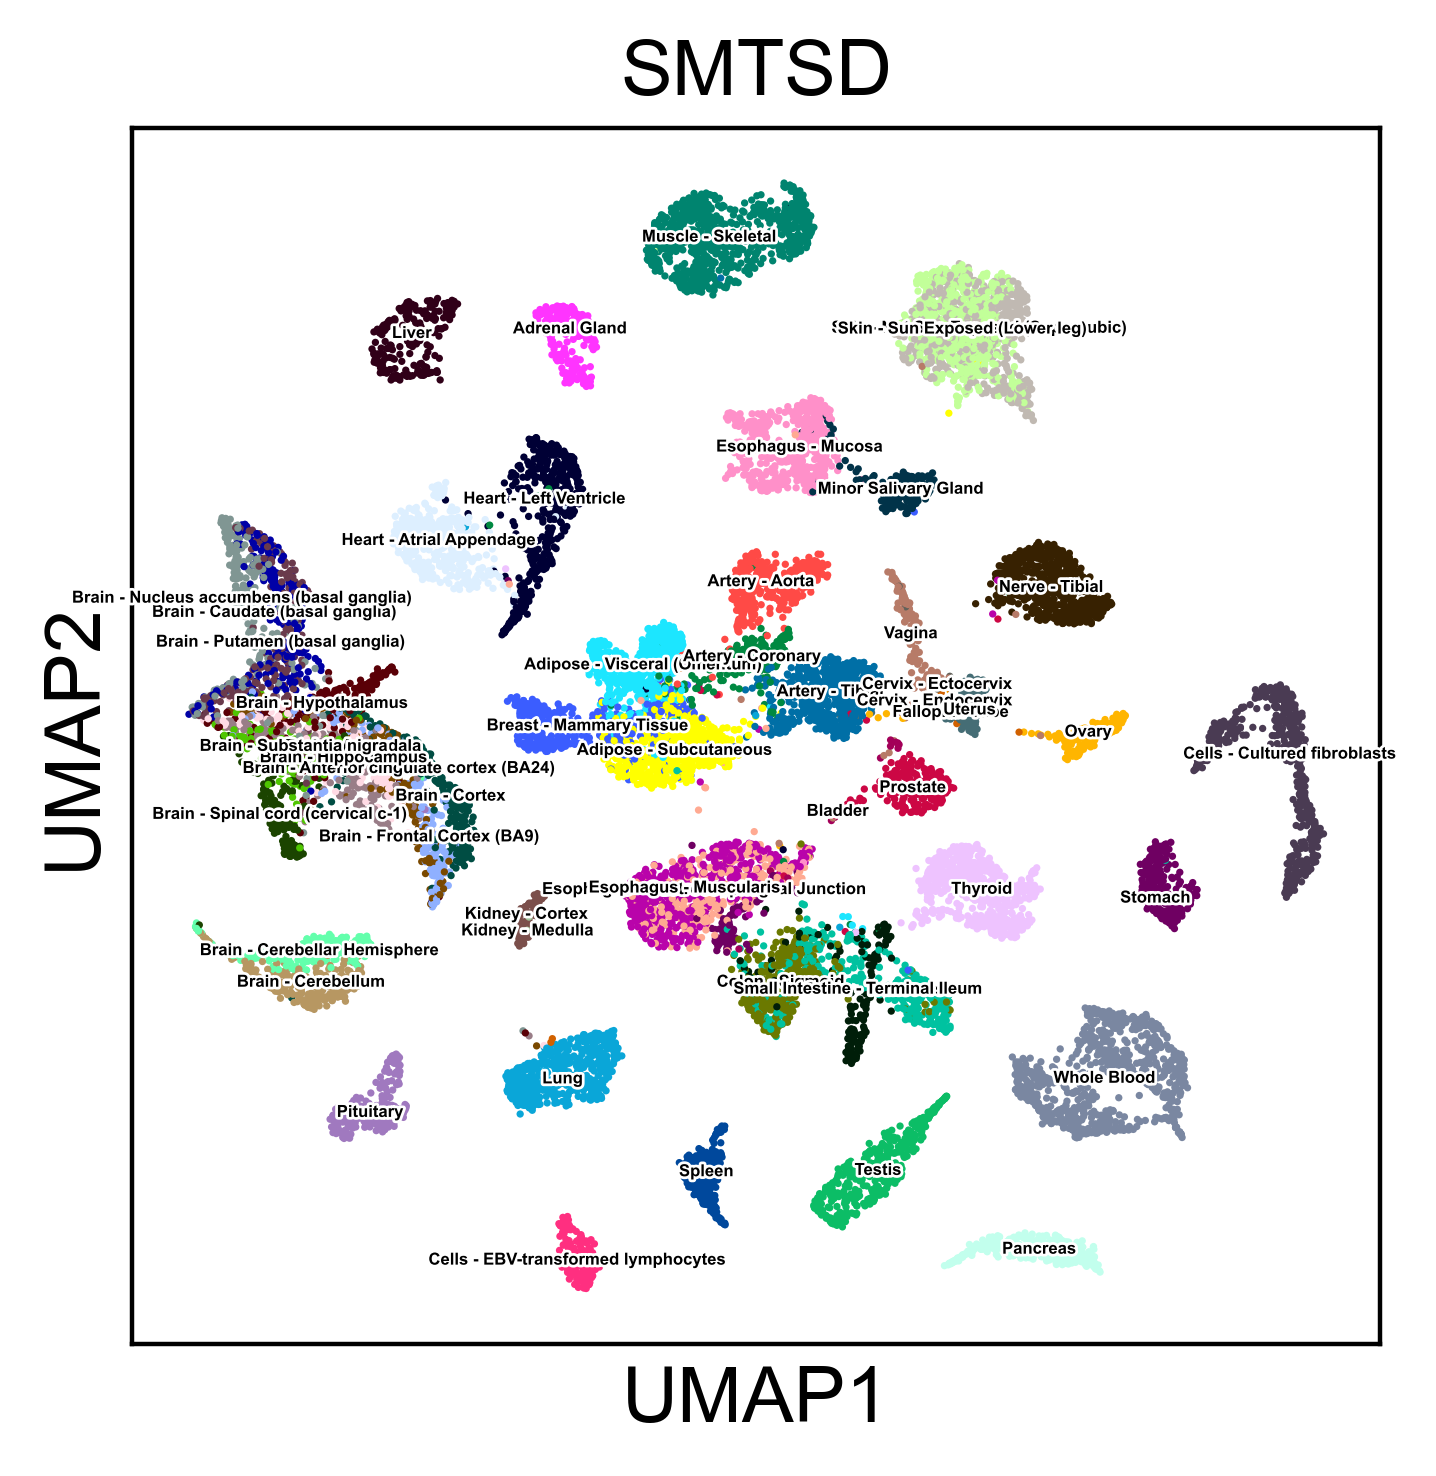

In [43]:
sc.settings.set_figure_params(dpi=200, facecolor='white')
sc.pl.umap(adata, color='SMTSD', legend_loc='on data', legend_fontsize=3, legend_fontoutline=True)